# Binary Search Tree

Basic BST tree for now, with some nice visualization.

In [22]:
import numpy as np # For testing only
import matplotlib.pyplot as plt
import networkx as nx

4:4(1:1(0:0(None)(None))(2:2(None)(3:3(None)(None))))(9:9(5:5(None)(7:7(6:6(None)(None))(8:8(None)(None))))(10:10(None)(None)))
4


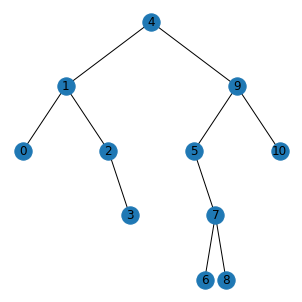

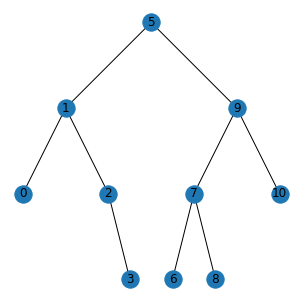

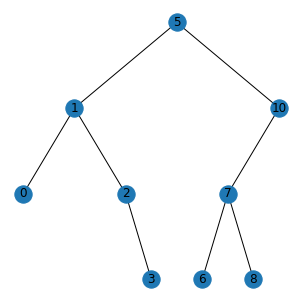

In [58]:
class Node:
    """BST node."""
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.left =  None # Left and right branches
        self.right = None
        
    def __str__(self):
        return f"{self.key}:{self.value}({str(self.left)})({str(self.right)})"
    
    def write(self,key,value):
        if key==self.key:
            self.value = value
        elif key<self.key:
            if self.left is None:   self.left = Node(key,value)
            else:                   self.left.write(key,value)
        else:
            if self.right is None:   self.right = Node(key,value)
            else:                    self.right.write(key,value)
                
    def read(self,key):
        if key==self.key:      return self.value
        if key< self.key:
            if self.left is None: return None
            return self.left.read(key)
        else:
            if self.right is None: return None
            return self.right.read(key)
        
    def delete(self,key):
        if key==self.key:       return self._remove()
        if key< self.key:
            if self.left is not None: self.left = self.left.delete(key)
        else:
            if self.right is not None: self.right = self.right.delete(key)
        return self
            
    def _remove(self):
        """Helper that actually deletes a given node."""
        if self.left is None and self.right is None: return None
        if self.left is None: return self.right
        if self.right is None: return self.left
        # Now we are in "both kids" branch. Look for successor.
        succ_parent = self
        succ = self.right
        while succ.left is not None:
            succ_parent = succ
            succ = succ.left
        succ.key, self.key = self.key, succ.key
        succ.value, self.value = self.value, succ.value
        if succ_parent != self:
            succ_parent.left = succ.right
        else:
            succ_parent.right = succ.right
        return self

class Tree:
    def __init__(self):
        self.root = None
        
    def __str__(self):
        return str(self.root)
    
    def write(self,key,value):
        if self.root==None: self.root = Node(key,value) # Special case for the very first node
        else: self.root.write(key,value)
            
    def read(self,key):
        if self.root==None: return None
        return self.root.read(key)
    
    def delete(self,key):
        self.root = self.root.delete(key)
        
    def plot(self):
        g = nx.Graph()
        q = [(None, self.root, 0,0)]
        shifts = {}
        while q:
            parent,node,level,shift = q.pop(0)
            g.add_node(node.key)
            shifts[node.key] = [shift, -level]
            if parent is not None:                g.add_edge(parent.key, node.key)
            if node.left is not None:             q.append((node, node.left,  level+1, shift-1/(2**level)))
            if node.right is not None:            q.append((node, node.right, level+1, shift+1/(2**level)))
        fig = plt.figure(figsize=(4,4))
        pos = nx.planar_layout(g)
        pos = {key:shifts[key] for key,val in pos.items()}
        nx.draw(g, pos, with_labels=True)
            
# Test
np.random.seed(2)
t = Tree()
for i in np.random.permutation(11):
    t.write(i,str(i))
print(t)
t.plot()
print(t.read(4))
t.delete(4)
t.plot()
t.delete(9)
t.plot()